In [5]:
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt

In [6]:
in_file = '/Users/shreya/Downloads/height_weight_gender.dat'
df = pd.read_csv(in_file)
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [39]:
df['Gender'].value_counts()

Male      5000
Female    5000
dtype: int64

In [19]:
df.iloc[df['Weight'].idxmax()]

Gender        Male
Height    78.99874
Weight    269.9897
Name: 2014, dtype: object

In [20]:
df.iloc[df['Weight'].idxmin()]

Gender      Female
Height    54.26313
Weight    64.70013
Name: 9285, dtype: object

In [4]:
isMale = df['Gender'] == 'Male'
isFemale = df['Gender'] == 'Female'

males = df[isMale]
females = df[isFemale]

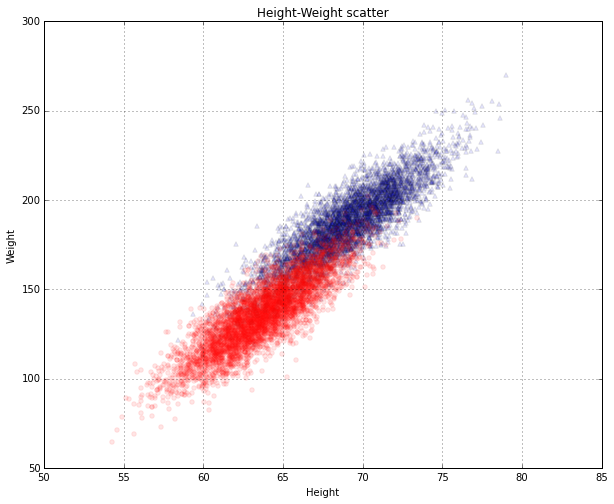

In [41]:
#fig, ax = plt.subplots()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1,1)

males.plot(x='Height', y = 'Weight', ax = ax, title = 'Height-Weight scatter', legend = False, kind = 'scatter', marker = '^', alpha=0.1)
females.plot(x='Height', y = 'Weight', ax = ax, title = 'Height-Weight scatter', legend = False, kind = 'scatter', marker = 'o', color='red', alpha=0.1)

Start training
--------------

In [42]:
from sklearn.cross_validation import train_test_split

In [43]:
data = df.copy()
y = data.pop('Gender')

In [44]:
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.25)

In [45]:
train = pd.DataFrame(X_train, columns=df.columns)
test = pd.DataFrame(X_test, columns=df.columns)

Fit a simple logistic regression classifier to classify male/female.

In [46]:
from sklearn.linear_model import LogisticRegression

import time

start_time = time.time()

model = LogisticRegression(verbose=1, max_iter=100)
model.fit(X_train, y_train)

total_seconds = time.time() - start_time
print 'Finished in', total_seconds, 'seconds'

[LibLinear]Finished in 0.0220839977264 seconds


In [47]:
model.score(X_test, y_test)

0.91679999999999995

In [48]:
t = X_test.iloc[0]
t

Height     78.998742
Weight    269.989699
Name: 2014, dtype: float64

In [49]:
model.predict(t) == y_test.iloc[0]

array([ True], dtype=bool)

In [50]:
if(model.predict(t) == y_test.iloc[0]):
    print "filter works"
else:
    print "filter doesn't work"

filter works


In [72]:
model.predict((t['Height'],t['Weight'])) 

array(['Male'], dtype=object)

Look at the things we got wrong in the dataset
-----------------------------

In [94]:
pred_true_train_arr = zip(model.predict(data), y)

pred_true_train_df = pd.DataFrame(pred_true_train_arr, columns=['pred', 'true'])

In [95]:
wrong_indices = pred_true_train_df[pred_true_train_df['pred'] != pred_true_train_df['true']].index
wrong_predictions = df.iloc[wrong_indices.tolist()]
wrong_predictions_orig_males = wrong_predictions[isMale]
wrong_predictions_orig_females = wrong_predictions[isFemale]

/Users/smohan/code/VirtualEnvs/sm_vault/lib/python2.7/site-packages/pandas/core/frame.py:1819: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


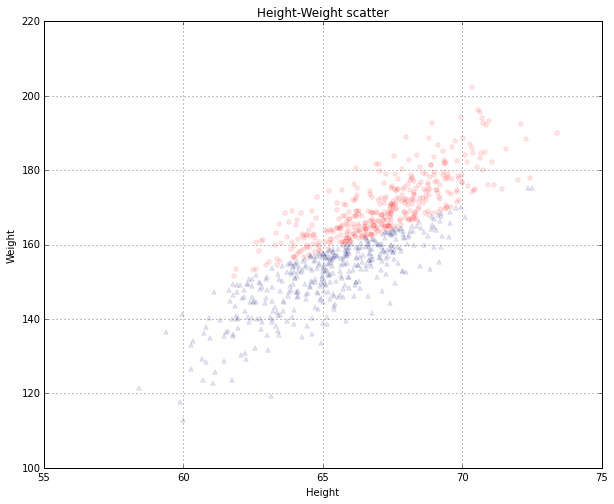

In [96]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1,1)

wrong_predictions_orig_males.plot(x='Height', y = 'Weight', ax = ax, title = 'Height-Weight scatter', legend = False, kind = 'scatter', marker = '^', alpha=0.1)
wrong_predictions_orig_females.plot(x='Height', y = 'Weight', ax = ax, title = 'Height-Weight scatter', legend = False, kind = 'scatter', marker = 'o', color='red', alpha=0.1)

Looks like that the line that the classifier fit passes between the red and blue areas of the graph. All women above/all men below this line are incorrectly labeled.

In [98]:
from sklearn.externals import joblib
joblib.dump(model, '/Users/shreya/code/height_weight_analysis/model.pkl') 

['/Users/smohan/code/height_weight_analysis/model.pkl',
 '/Users/smohan/code/height_weight_analysis/model.pkl_01.npy',
 '/Users/smohan/code/height_weight_analysis/model.pkl_02.npy',
 '/Users/smohan/code/height_weight_analysis/model.pkl_03.npy']